In [2]:
!pip install numpy==1.16.1

  Using cached https://files.pythonhosted.org/packages/f5/bf/4981bcbee43934f0adb8f764a1e70ab0ee5a448f6505bd04a87a2fda2a8b/numpy-1.16.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.2
    Uninstalling numpy-1.16.2:
      Successfully uninstalled numpy-1.16.2


## Required functions

In [4]:
import numpy as np
print(np.__version__)

%matplotlib inline
import matplotlib.pyplot as plt

1.16.1


## Load IMDB Movie dataset

In [5]:
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [173]:
print("Number of train data:", len(x_train))
print("Number of test data:", len(x_test))

Number of train data: 25000
Number of test data: 25000


The length of a movie review (train data).

In [154]:
len(x_train[927])

117

It is a negative review.

In [8]:
y_train[927]

0

## Preprocessing before RNN

We make the input reviews have the same length.

In [0]:
from keras.preprocessing import sequence

In [0]:
x_train = sequence.pad_sequences(x_train, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

## Build RNN

Parameters

- $N$: The dimension of the every input review
- $K$: Number of neurons in a LSTM cell 

In [0]:
N = 500  
K1 = 3
K2 = 25

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, LSTM
from keras.optimizers import Adadelta
import keras.callbacks

In order to monitor the accuracy of the validation data through the training process, we define a simple `early stopping callback` function.

In [0]:
ES = keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=1)

In [0]:
model = Sequential()

model.add(Embedding(10000, N))
model.add(LSTM(K1, return_sequences=True)) # Return hidden state
model.add(Dropout(0.4))                    # Prevent overfitting
model.add(LSTM(K2))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))  # Output activation function: sigmoid

Compile the RNN model.

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [260]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, None, 500)         5000000   
_________________________________________________________________
lstm_47 (LSTM)               (None, None, 3)           6048      
_________________________________________________________________
dropout_70 (Dropout)         (None, None, 3)           0         
_________________________________________________________________
lstm_48 (LSTM)               (None, 25)                2900      
_________________________________________________________________
dropout_71 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 26        
Total params: 5,008,974
Trainable params: 5,008,974
Non-trainable params: 0
_________________________________________________________________


## Train RNN

In [254]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=64, epochs=5, verbose=1, callbacks=[ES])

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 248s 10ms/step - loss: 0.4406 - acc: 0.7942 - val_loss: 0.3134 - val_acc: 0.8652
Epoch 2/5
25000/25000 [==============================] - 237s 9ms/step - loss: 0.2502 - acc: 0.9050 - val_loss: 0.3128 - val_acc: 0.8704
Epoch 3/5
25000/25000 [==============================] - 235s 9ms/step - loss: 0.1822 - acc: 0.9337 - val_loss: 0.3519 - val_acc: 0.8522
Epoch 00003: early stopping


In [261]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=64, epochs=2, verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 248s 10ms/step - loss: 0.4347 - acc: 0.7955 - val_loss: 0.3301 - val_acc: 0.8590
Epoch 2/2
25000/25000 [==============================] - 240s 10ms/step - loss: 0.2473 - acc: 0.9047 - val_loss: 0.3045 - val_acc: 0.8704


## Fitting results 

- Max length of the input review = 200
- Optimizer: adam

- Type I

  - Dropout functions are set after embedding and LSTM layer 
  - 1 LSTM layer

|Model|LSTM Settings|Droupout|Accuracy_train|Accuracy_test|
|----------|------------------------|---------------|-----------------------|-----------------------|
1|  N=3, K=30|  (0.2,0.3)| 0.8876| 0.8670
2|  N=4, K=30|  (0.2,0.3)| 0.8912| 0.8641
3|  N=5, K=30|  (0.2,0.3)| 0.8880| 0.8636

- Type II
  - Dropout function is set after embedding 
  - 1 LSTM layer

|Model|LSTM Settings|Droupout|Accuracy_train|Accuracy_test|
|----------|------------------------|---------------|-----------------------|-----------------------|
1|  N=3, K=30| 0.3| 0.8776| 0.8674

- Type III
  - Dropout function is set after  LSTM layers (0.4,0.3)
  - 2 LSTM layers

|Model|LSTM Settings|Accuracy_train|Accuracy_test|
|----------|------------------------|------------------------|-----------------------|
1|  N=100, $K_1=3$, $K_2=10$ | 0.8926| 0.8635
2|  N=100, $K_1=5$, $K_2=10$ | 0.8838| 0.8573
3|  N=150, $K_1=5$, $K_2=20$ | 0.9078| 0.8596
4|  N=200, $K_1=5$, $K_2=20$ | 0.9271| 0.8675
5|  N=300, $K_1=5$, $K_2=20$ | 0.9014| 0.8663
6|  N=200, $K_1=3$, $K_2=20$ | 0.9220| 0.8664
6|  N=500, $K_1=3$, $K_2=25$ | 0.9050| 0.8704



## Plot the accuaracy at every epoch

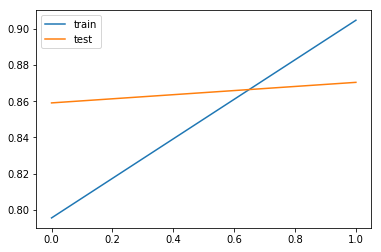

In [265]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()